In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

import dataset

In [9]:
kopi = pd.read_csv('data_sebaran.csv')
kopi.head()

,Kecamatan,LuasKecamatanKM2,LuasKebunKopiHektar,HasilProduksiTon
0,Wamena,110.85,19,0.00
1,Wouma,48.75,10,0.00
2,Hubikosi,105.97,180,6.68
3,Hubikiak,158.67,20,0.00
4,Pelebaga,190.95,100,2.88


In [10]:
kopi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 4 columns):
Kecamatan              23 non-null object
LuasKecamatanKM2       23 non-null float64
LuasKebunKopiHektar    23 non-null int64
HasilProduksiTon       23 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 864.0+ bytes


In [11]:
kopi = kopi.drop(['Kecamatan','LuasKecamatanKM2'], axis = 1)
kopi

,LuasKebunKopiHektar,HasilProduksiTon
0,19,0.00
1,10,0.00
2,180,6.68
3,20,0.00
4,100,2.88
5,15,2.25
6,140,4.00
7,110,15.13
8,185,4.56
9,6,0.00


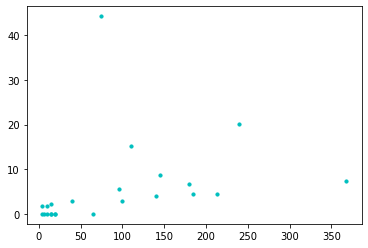

In [12]:
plt.scatter(kopi.LuasKebunKopiHektar, kopi.HasilProduksiTon, s =10, c = 'c', marker = 'o', alpha = 1)
plt.show()

Menentukan Variabel Yang Akan Dikelompokan

In [13]:
kopi_x = kopi.iloc[:, 0:2]
kopi_x.head()

,LuasKebunKopiHektar,HasilProduksiTon
0,19,0.00
1,10,0.00
2,180,6.68
3,20,0.00
4,100,2.88


Mengubah variabel data frame menjadi array sebelum menentukan nilai K.

In [14]:
x_array = np.array(kopi_x)
print(x_array)

[[ 19.     0.  ]
 [ 10.     0.  ]
 [180.     6.68]
 [ 20.     0.  ]
 [100.     2.88]
 [ 15.     2.25]
 [140.     4.  ]
 [110.    15.13]
 [185.     4.56]
 [  6.     0.  ]
 [145.     8.76]
 [  4.     0.  ]
 [ 96.     5.65]
 [  4.     1.75]
 [368.     7.36]
 [ 15.     0.  ]
 [240.    20.22]
 [213.     4.38]
 [ 15.     0.  ]
 [ 75.    44.26]
 [ 40.     2.8 ]
 [ 65.     0.  ]
 [ 10.     1.75]]


Menstandarkan kembali ukuran variabel array.

In [15]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_array)
x_scaled

array([[0.04120879, 0.        ],
       [0.01648352, 0.        ],
       [0.48351648, 0.15092634],
       [0.04395604, 0.        ],
       [0.26373626, 0.06507004],
       [0.03021978, 0.05083597],
       [0.37362637, 0.09037506],
       [0.29120879, 0.34184365],
       [0.49725275, 0.10302756],
       [0.00549451, 0.        ],
       [0.38736264, 0.19792137],
       [0.        , 0.        ],
       [0.25274725, 0.12765477],
       [0.        , 0.03953909],
       [1.        , 0.1662901 ],
       [0.03021978, 0.        ],
       [0.64835165, 0.45684591],
       [0.57417582, 0.09896069],
       [0.03021978, 0.        ],
       [0.19505495, 1.        ],
       [0.0989011 , 0.06326254],
       [0.16758242, 0.        ],
       [0.01648352, 0.03953909]])

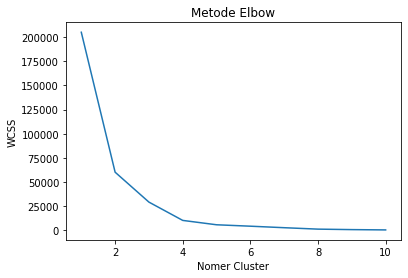

In [23]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300,
                    n_init=10, random_state=0)
    kmeans.fit(kopi_x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Metode Elbow')
plt.xlabel('Nomer Cluster')
plt.ylabel('WCSS')
plt.show()

In [16]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++')

menentukan nilai K (cluster) dari data.

In [17]:
kmeans.fit(x_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [18]:
print(kmeans.cluster_centers_)

[[0.19505495 1.        ]
 [0.07123234 0.02756439]
 [0.53193681 0.20077384]]


In [19]:
kopi['cluster'] = kmeans.labels_

Memvisualisasikan hasil cluster

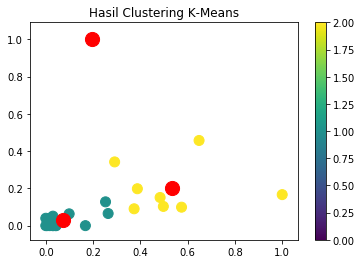

In [20]:
output = plt.scatter(x_scaled[:,0], x_scaled[:,1], s = 100, c = kopi.cluster, marker = 'o', alpha = 1, )
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=1 , marker='o');
plt.title('Hasil Clustering K-Means')
plt.colorbar (output)
plt.show()

In [21]:
result=kopi['cluster'].groupby(kopi['cluster'], axis=0).count()
print(result)
print(kopi)

cluster
0     1
1    14
2     8
Name: cluster, dtype: int64
    LuasKebunKopiHektar  HasilProduksiTon  cluster
0                    19              0.00        1
1                    10              0.00        1
2                   180              6.68        2
3                    20              0.00        1
4                   100              2.88        1
5                    15              2.25        1
6                   140              4.00        2
7                   110             15.13        2
8                   185              4.56        2
9                     6              0.00        1
10                  145              8.76        2
11                    4              0.00        1
12                   96              5.65        1
13                    4              1.75        1
14                  368              7.36        2
15                   15              0.00        1
16                  240             20.22        2
17                  21

In [29]:
#export_csv = kopi.to_csv (r'C:\Users\Aprea\Documents\GitHub\export_dataframesebarankopi.csv', index = None, header=True) #Don't forget to add '.csv' at the end of the path

In [31]:
export_excel = kopi.to_excel (r'C:\Users\Aprea\Documents\GitHub\export_dataframesebarankopi.xlsx', index = None, header=True) #Don't forget to add '.xlsx' at the end of the path

In [32]:
print(kopi)

    LuasKebunKopiHektar  HasilProduksiTon  cluster
0                    19              0.00        1
1                    10              0.00        1
2                   180              6.68        2
3                    20              0.00        1
4                   100              2.88        1
5                    15              2.25        1
6                   140              4.00        2
7                   110             15.13        2
8                   185              4.56        2
9                     6              0.00        1
10                  145              8.76        2
11                    4              0.00        1
12                   96              5.65        1
13                    4              1.75        1
14                  368              7.36        2
15                   15              0.00        1
16                  240             20.22        2
17                  213              4.38        2
18                   15        

In [33]:
export_excel = result.to_excel (r'C:\Users\Aprea\Documents\GitHub\export_dataframesebarankopiresult.xlsx', index = None, header=True) #Don't forget to add '.xlsx' at the end of the path

In [34]:
print(result)

cluster
0     1
1    14
2     8
Name: cluster, dtype: int64
